In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')


In [2]:
# Load dataset time-series hasil transformasi
ts = pd.read_csv("used_cars_timeseries.csv")

ts.head()


,age,price
0,0,91580.833333
1,1,86093.429204
2,2,68011.525424
3,3,65286.374286
4,4,58277.819876


In [3]:
ts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     34 non-null     int64  
 1   price   34 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 672.0 bytes


In [4]:
ages = ts['age'].values
prices = ts['price'].values

# Pastikan harga valid > 0
mask = prices > 0
ages = ages[mask]
prices = prices[mask]

ages, prices[:5]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 50],
       dtype=int64),
 array([91580.83333333, 86093.42920354, 68011.52542373, 65286.37428571,
        58277.81987578]))

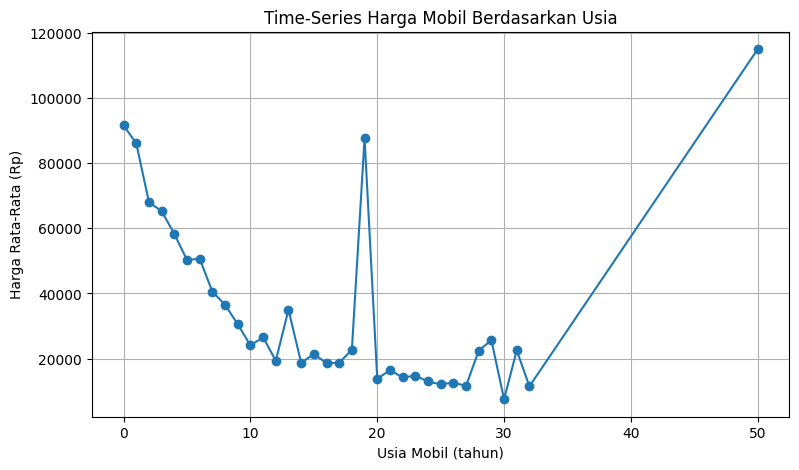

In [5]:
plt.figure(figsize=(9,5))
plt.plot(ages, prices, marker='o')
plt.xlabel("Usia Mobil (tahun)")
plt.ylabel("Harga Rata-Rata (Rp)")
plt.title("Time-Series Harga Mobil Berdasarkan Usia")
plt.grid(True)
plt.show()


In [6]:
log_prices = np.log(prices)

# Regresi: log(V) = a + b*t → b = -k
b, a = np.polyfit(ages, log_prices, 1)

k_est = -b
V0_est = np.exp(a)

print("Estimasi k (laju penyusutan) =", k_est)
print("Estimasi V0 (nilai awal aset) =", V0_est)


Estimasi k (laju penyusutan) = 0.02830084482079183
Estimasi V0 (nilai awal aset) = 43511.7048354535


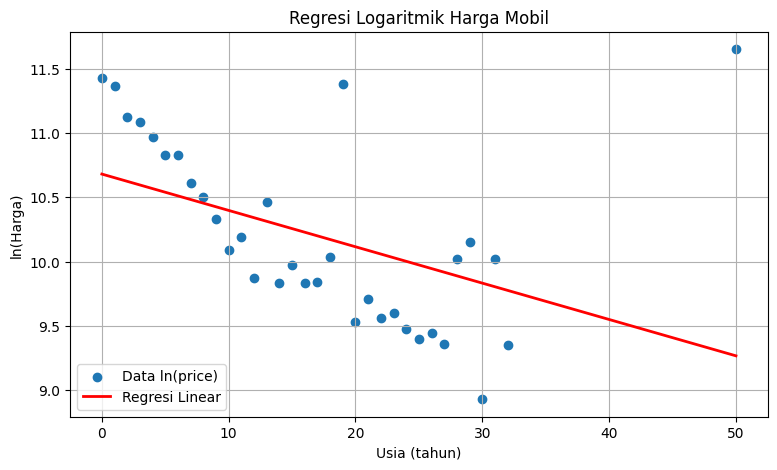

In [7]:
age_line = np.linspace(ages.min(), ages.max(), 100)
log_fit = a + b * age_line

plt.figure(figsize=(9,5))
plt.scatter(ages, log_prices, label="Data ln(price)")
plt.plot(age_line, log_fit, color='red', linewidth=2, label="Regresi Linear")
plt.xlabel("Usia (tahun)")
plt.ylabel("ln(Harga)")
plt.title("Regresi Logaritmik Harga Mobil")
plt.grid(True)
plt.legend()
plt.show()


In [8]:
def model_penyusutan(V, t, k):
    return -k * V

def euler_method(func, y0, t_points, params):
    y = np.zeros(len(t_points))
    y[0] = y0
    h = t_points[1] - t_points[0]

    for i in range(len(t_points) - 1):
        slope = func(y[i], t_points[i], *params)
        y[i+1] = y[i] + h * slope

    return y


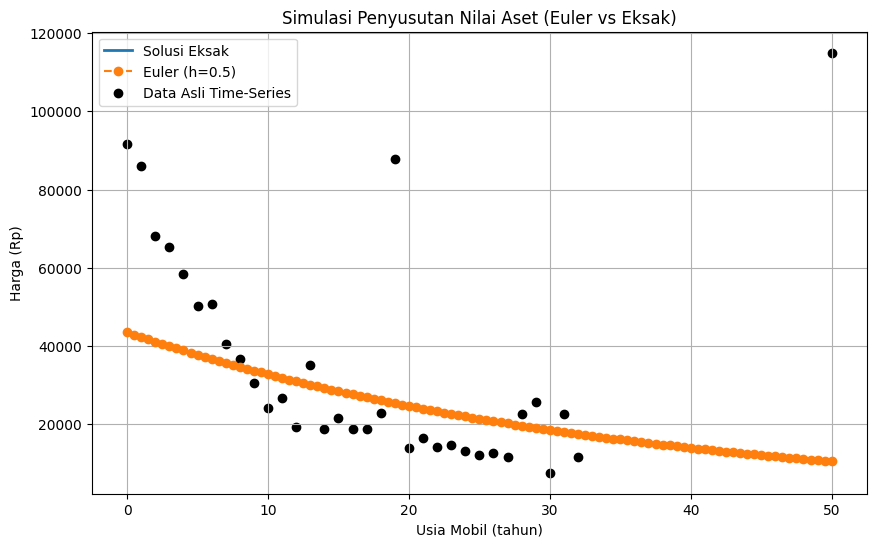

In [9]:
t_start = 0
t_end = ages.max()
h = 0.5  # step size

t_points = np.arange(t_start, t_end + h, h)

# Euler method
V_euler = euler_method(model_penyusutan, V0_est, t_points, (k_est,))

# Exact solution
V_exact = V0_est * np.exp(-k_est * t_points)

# Plot
plt.figure(figsize=(10,6))
plt.plot(t_points, V_exact, label="Solusi Eksak", linewidth=2)
plt.plot(t_points, V_euler, 'o--', label=f"Euler (h={h})")
plt.scatter(ages, prices, color='black', label="Data Asli Time-Series")
plt.xlabel("Usia Mobil (tahun)")
plt.ylabel("Harga (Rp)")
plt.title("Simulasi Penyusutan Nilai Aset (Euler vs Eksak)")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Interpolasi nilai Euler ke usia yang sama dengan data
sim_interp = np.interp(ages, t_points, V_euler)

MSE = np.mean((sim_interp - prices)**2)
MAE = np.mean(np.abs(sim_interp - prices))

print("MSE =", MSE)
print("MAE =", MAE)


MSE = 664866523.7730374
MAE = 15765.797104951587
